# This exam is due on 10/2/2020 Friday at 11:59 PM

### Read the following instructions carefully.

1. There are 5 problems in this test, and each is worth 20 points. There is also a bonus problem that is worth 10 points.

2. Collaborating is not allowed in this Exam. Piazza common forum will be in a radio silence during this Exam. You should not share your code in the piazza or anywhere, either. If you need to ask me something, make it a private post. I will be running plagiarism software to check all the submitted solutions. Any academic misconduct will be reported to the dean of students office immediately.

3. You can use our textbooks, posted lab and HWs solutions, and the internet to get help with the Exam.

4. Each problem and parts of these problems should be answered with codes and written analysis. Missing one or more of these codes and analysis is considered to be an incomplete solution.

5. When you solve exam problems, I want you to clean up the final submission file. For example, do not show the whole data if it is not asked. Do not print unnecessary output. Clearly label the solutions and write solutions right underneath the problem.

6. Submit the exam  in Canvas by following the link in canvas. Both files: html and ipynb are required for your exam 1 solution to be graded.


This exam uses diabetes data. More details about the data can be found in the following link.
https://data.world/data-society/pima-indians-diabetes-database

### Problem 1
Upload the diabetes data, remove the null values if there is any and check the data types of all the variables to make sure that variables are labeled correctly. Find out which variables have how many zeros. The zero values of Glucose, BloodPressure, BMI do not make any sense. Remove the rows where these three variables have zero values. Report the dimensions of the data and use the describe function to display various facts about the data.

In [35]:
#import packages
import pandas as pd
import numpy as np

In [36]:
#Upload the diabetes data
diabetes = pd.read_csv("diabetes.csv") 
print("written analysis" )
print("Finction removeZeros() all zeros from Glucose, BloodPressure, BMI" )
print("diabetes.dropna(axis=0,inplace=True) removes all missing rows ")
print("diabetes.astype(bool).sum(axis=0) gives us the number of non 0 elements. So diabetes.shape[0] gives us the total number of elements\n")

def removeZeros(dataframe):
    data = dataframe[['BloodPressure','Glucose','BMI']]
    for row in data.index:
        if data.loc[row, 'BloodPressure'] == 0 or data.loc[row, 'Glucose'] == 0 or data.loc[row, 'BMI'] == 0:
            dataframe = dataframe.drop(row, axis=0)
    return dataframe

#remove all zeros
diabetes = removeZeros(diabetes)
#remove the null values
diabetes.dropna(axis=0,inplace=True)
print("dimensions",diabetes.shape)
print("number of zeros")
print(diabetes.shape[0] - diabetes.astype(bool).sum(axis=0)  )
diabetes.describe()
diabetes


written analysis
Finction removeZeros() all zeros from Glucose, BloodPressure, BMI
diabetes.dropna(axis=0,inplace=True) removes all missing rows 
diabetes.astype(bool).sum(axis=0) gives us the number of non 0 elements. So diabetes.shape[0] gives us the total number of elements

dimensions (724, 9)
number of zeros
Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Use the data obtained in problem 1 for the following problems.

###  Problem 2
The Glucose variable lists all the Pima Indian women's glucose in the data set after 2 hours of the glucose tolerance test. Suppose a prediabetic person's blood glucose ranges between 140 and 199 mg/dl (both included). Also, anybody who has a BMI of more than 30 is obese. Find out how many prediabetic Pima Indian women who were obese did not have diabetes. Make at least one more observation about these women by looking at the data you came up with.

In [55]:
# diabetes.query('Glucose <= 199 or Glucose >= 140 or BMI > 30')

print("obese > 30 but did not have diabetes" ,len(diabetes.query('Glucose > 140 and Glucose < 199 and BMI > 30 and Outcome == 0')) )

# one more observation
print("for patients is over Age and Glucose is > 100 they have 59% chance to have diabetes",diabetes.query('Age > 40 and Glucose > 100')['Outcome'].mean())


obese > 30 but did not have diabetes 36
for patients is over Age and Glucose is > 100 they have 59% chance to have diabetes 0.5947712418300654


### Problem 3
 Let's define two new variables.  Weight is a new variable defined as follows: underweight if  BMI $<$ 18.5;
normalweight if  18.5 $\leq $ BMI $<$ 25; overweight if  25 $\leq $ BMI $<$ 30; and 
obese if  BMI $\geq 30$. BPclass is another new variable defined as follows: normal if BloodPressure $\leq $ 80; stage1hypertension if BloodPressure is $> 80$ and $\leq 89$; stage2hypertension if BloodPressure is $> 89$. Answer the following questions.

a) How many Pima Indian Women are in each Weight category? Use the Pigeonhole principle using total number of womens as pigeons and weight categoris as holes to make a statement.

b) How many Pima Indian Women are in each BPclass category? Use Pigeonhole principle using total number of womens as pigeons  and BPclass categoris as holes to make a statement.

In [38]:
print("written analysis" )
print("setUpWeight() creates Weight column" )
print("setUpBPclass(df) Creates BPclass column" )
print("Then for part (A,B) we can uses a groupby(column index).size to get the number of each present varable\n")
# Creates Weight column  
def setUpWeight(df):
    l = []
    for index in df.index:
        row = df.loc[index]
        if row['BMI'] < 18.5 :
            l.append('underweight')
        elif row['BMI'] >= 18.5 and row['BMI'] < 25 :
            l.append('normalweight')
        elif row['BMI'] < 25 and row['BMI'] < 30:
            l.append('overweight')
        else:
            l.append('obese')       
    return l
# Creates BPclass column  
def setUpBPclass(df):
    l = []
    lnum = []
    for index in df.index:
        row = df.loc[index]
        if row['BloodPressure'] <= 80 :
            l.append('normal') 
            lnum.append(0)
        elif row['BloodPressure'] > 80 and row['BloodPressure'] <= 89 :
            l.append('stage1hypertension ')
            lnum.append(1)
        else:
            l.append('stage2hypertension')
            lnum.append(2)
    df = df.assign(BPclass_oneHot = lnum) 
    return l,lnum
l,lnum = setUpBPclass(diabetes)

diabetes = diabetes.assign(Weight = setUpWeight(diabetes)) 
diabetes = diabetes.assign(BPclass = l) 
#one Hot Incoding 
diabetes = diabetes.assign(BPclass_oneHot = lnum) 

print("part A : ", diabetes.groupby('Weight').size())
print("part B : ", diabetes.groupby('BPclass').size())

print("\nPigeonhole principle : Since there are only 3 holes and 724 Pigeon then there is at least one hole with more then 1 Pigeon  ")


written analysis
setUpWeight() creates Weight column
setUpBPclass(df) Creates BPclass column
Then for part (A,B) we can uses a groupby(column index).size to get the number of each present varable

part A :  Weight
normalweight     96
obese           624
underweight       4
dtype: int64
part B :  BPclass
normal                 561
stage1hypertension     104
stage2hypertension      59
dtype: int64

Pigeonhole principle : Since there are only 3 holes and 724 Pigeon then there is at least one hole with more then 1 Pigeon  


### Problem 4
Plot the following: Vertical bar graph of the Weight variable, a pie chart of the BPclass variable, histogram (with 10 bins) of the Age variable, and scatter plot of the variables BMI (in x-axis) BloodPressure ( in the y-axis). Add labels, titles, legends where appropriate, different colors for different graphs in your plots. Finally, make at least one observation from each of the plots.

written analysis
Combination of matplotlib graphs and creation through pandas didnt know this was a thing


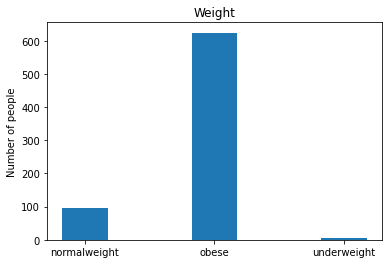

scatter plot
pi


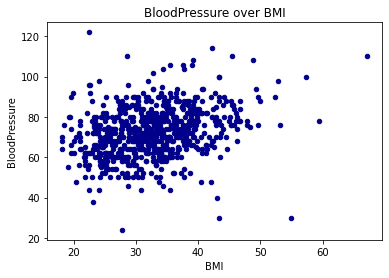

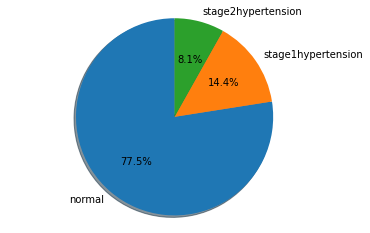

histogram


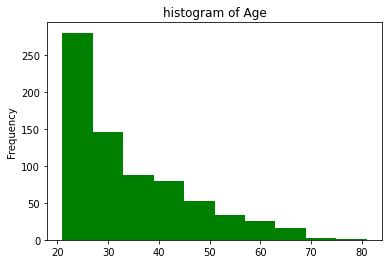

In [39]:
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sbn

print("written analysis" )
print("Combination of matplotlib graphs and creation through pandas didnt know this was a thing")
#bar 
labels = ['normalweight','obese','underweight']
data = []
for s in  diabetes.groupby('Weight').size():
    data.append(s)
width = 0.35  
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.set_title('Weight')
ax.bar(labels, data, width, label='Weight')
plt.show()

#scatter plot
print("scatter plot")
scatter = diabetes.plot.scatter(x='BMI',
                      y='BloodPressure',
                      c='DarkBlue',title='BloodPressure over BMI')
#pi
print("pi")
labels = ['normal', 'stage1hypertension', 'stage2hypertension']
data = []
for s in  diabetes.groupby('BPclass').size():
    data.append(s)
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

print("histogram")
# histogram = diabetes['Age'].hist(bins=10,color='green',title="histogram of Age")
histogram = diabetes['Age'].plot.hist(bins=10,color='green',title="histogram of Age")

### Problem 5
If mean $=$ median $=$ mode for a variable, the variable will have a bell-shaped curve when we plot it. The curve will also be symmetric about the mean. Please note that the data with bell-shaped curve is ideal and hard to come by. Data is often skewed and has outliers. Karl Pearson, a renowned statistician, expressed the  relationship between mean, median, and mode for a data (ideal or not) as follows: Mode $-$ Median $= 2$ ( Median $-$ Mean). Do the following.

a) For all the numerical variables, except Outcome, find Mode $-$3 Median $+$ 2 Mean. If this number is close to zero (positive or negative), then the variable is close to being symmetric. Find out which variables are close to symmetric and which are farther away from being symmetric.

b) For all the numerical variables except Outcome, find the first quartile $Q_1$ and  third quartile $Q_3$.   For any variable, if any data falls below
the number $ Q_1- 1.5 \, IQR$ or falls above the number $ Q_3+ 1.5\, IQR$ then those data points are outliers. Here $IQR = Q_3 - Q_1$ is called inter-quartile range. Find how many outliers does each numerical variables have?

In [40]:
print("written analysis" )
print("a) using built in function in pandas we can get mean,median, and mode as a list for all vars ")
print("then for each var in the three arrys we can find Mode  − 3 Median  +  2 Mean and if the var is symmetric")
print("b) using describe() we can get Q1 and Q_3 and 𝐼𝑄𝑅, Findoutliers(Q1,Q3,IQR, df) finds out if the number is below 𝑄1−1.5𝐼𝑄𝑅 or above 𝑄3+1.5𝐼𝑄𝑅   ")


dataSet = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]


mean = dataSet.mean()
median = dataSet.median()
mode = dataSet.mode()


def findA(mean,mode,median,tolerance ):
    columns={ 0 : 'Pregnancies' , 1: 'Glucose' , 2: 'BloodPressure',3 : 'SkinThickness' , 4: 'Insulin' , 5: 'BMI', 6 : 'DiabetesPedigreeFunction' , 7: 'Age',8 : 'Outcome'}
    symmetric = []
    for index in range(len(mean)):
        mean_i = mean[index]
        median_i = median[index]
        mode_i = mode[columns[index]]
        if columns[index] != 'Outcome':
            for n in range(3):
                mode_row = mode_i.loc[n]
                if np.isnan(mode_row) == False:
                    #the magic 
                    value = abs(mode_row - (3*median_i) + (2 * mean_i) )
                    if value < tolerance:

                        symmetric.append(columns[index])
                        symmetric.append(value)
                        break
    return symmetric
print("a) set .3 as the cut off tolerance : \n" , findA(mean,mode,median, .3))
#     find Mode  − 3 Median  +  2 Mean


Q1 = dataSet.describe().loc['25%']
Q3 = dataSet.describe().loc['75%']
IQR = Q3 - Q1
# 𝑄1−1.5𝐼𝑄𝑅  or falls above the number 𝑄3+1.5𝐼𝑄𝑅 

def Findoutliers(Q1,Q3,IQR, df):
    outliers = []
    position = 0;
    for column in df.columns:
        outliers.append([0])
        for index in df.index:
            row = df[column].loc[index]
            if row < (Q1[position]- (1.5*IQR[position])) or row > (𝑄3[position]+ (1.5*𝐼𝑄𝑅[position])):
                outliers[position][0]=  outliers[position][0] + 1
        position = position + 1 
    return outliers


outliers = Findoutliers(Q1,Q3,IQR, dataSet)
answerB = pd.DataFrame([outliers],index =['outliers'], columns= dataSet.columns.to_numpy())
print("\nb) liars")  
answerB


written analysis
a) using built in function in pandas we can get mean,median, and mode as a list for all vars 
then for each var in the three arrys we can find Mode  − 3 Median  +  2 Mean and if the var is symmetric
b) using describe() we can get Q1 and Q_3 and 𝐼𝑄𝑅, Findoutliers(Q1,Q3,IQR, df) finds out if the number is below 𝑄1−1.5𝐼𝑄𝑅 or above 𝑄3+1.5𝐼𝑄𝑅   
a) set .3 as the cut off tolerance : 
 ['Pregnancies', 0.2679558011049723, 'BMI', 0.2657458563535755, 'DiabetesPedigreeFunction', 0.06653038674033152]

b) liars


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
outliers,[4],[0],[14],[1],[29],[7],[28],[7]


#### Problem 6 (Bonus, Optional, 10 points)
A  new $\geq 40$ year-old obese Pima Indian Women named Chenoa has the data as follows: Chenoa had 6 or more pregnancies, has a glucose reading of 140 or more, and has hypertension (any stage). What is the probability that Chenoa has diabetes?

#### Note that a question like this is better answered using machine learning.
# Please try using only the things we have learned thus far.

In [44]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
print("builds a basic LinearRegression model and tests the new")

dataSet = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','BPclass','BPclass_oneHot','Outcome']]
X = dataSet[['Pregnancies','Glucose','BPclass_oneHot','Age']]
Y = dataSet['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# X, y = make_regression(n_features=4, n_informative=2,
#                      random_state=0, shuffle=True)
# regr = RandomForestRegressor(max_depth=2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred_test = regr.predict(X_test)
l = []
for n in range(100):
    l.append([np.random.randint(6,8),np.random.randint(140,160),np.random.randint(1,3),np.random.randint(40,55) ])

print('mean_absolute_error :', mean_absolute_error(y_test, y_pred_test))
print('predict: ' , regr.predict([[6,140,2,45]]))
print("for Pregnancies: 6 to 8, Glucose: 140 to 160 BPclass_oneHot: 1 to 3 Age: 40 to 55")

print('mean of 100 test patients: ' , regr.predict(l).mean())




builds a basic LinearRegression model and tests the new
mean_absolute_error : 0.3274562543132554
predict:  [0.57995954]
for Pregnancies: 6 to 8, Glucose: 140 to 160 BPclass_oneHot: 1 to 3 Age: 40 to 55
mean of 100 test patients:  0.6436131725871642
